Installing graphviz

In [ ]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


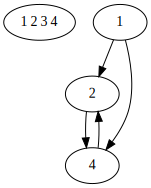

In [ ]:
from graphviz import Digraph
# Create Digraph object
example = Digraph(engine='dot')
# Add nodes 1 and 2
example.node('1 2 3 4')
example.node('2')
example.node('4')

# Add edge between 1 and 2
# first way
example.edge('1', '4')
example.edge('2', '4')
# second way
example.edges(['12'])
example.edges(['42'])


# Visualize the graph
example

In [ ]:
from graphviz import Digraph

styles = {
    'top': {'shape': 'ellipse', 'style': 'filled', 'color': 'lightblue'},
    'no':  {'shape': 'circle', 'style': 'filled', 'color': 'red'},
    'yes': {'shape': 'circle', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}

example_tree = Digraph(engine='dot')

example_tree.node('top', '', styles['top'])
example_tree.node('q1', 'Dynastia z Wessex', styles['qst'])

example_tree.node('q2', 'Do I like CS?', styles['qst'])
example_tree.node('no1', 'No ', styles['no'])

example_tree.node('q3', 'Is the lecture early in the morning?', styles['qst'])
example_tree.node('no2', 'No ', styles['no'])

example_tree.node('no3', 'No ', styles['no'])
example_tree.node('yes', 'Yes', styles['yes'])

example_tree.node('g4', 'Czy na nie pójdę?', styles['qst'])

example_tree.edge('top', 'q1')

example_tree.edge('q1', 'q2', 'Yes')
example_tree.edge('q1', 'no1', 'No')

example_tree.edge('q2', 'q3', 'Yes')
example_tree.edge('q2', 'no2', 'No')

example_tree.edge('q3', 'g4', 'Yes')
example_tree.edge('q3', 'yes', 'No')

example_tree.edge('g4', 'no3', 'Yes')

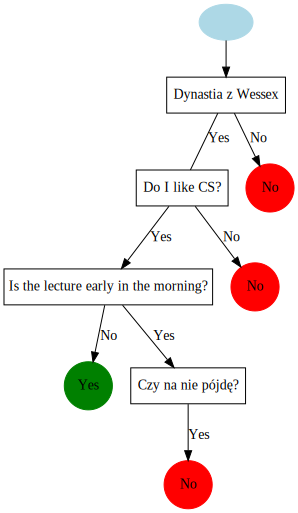

In [ ]:
example_tree

Kontynuacja zadania w ramach zadania domowego, utworzenie drzewa genealogicznego rodzinny Summersów (X-men, Marvel)

In [389]:
from graphviz import Digraph

# Utwórzenie obiektów grafu skierowanego, rodziny Summersów oraz Legendy dla grafu
summersFamily = Digraph(engine='dot')
legend = Digraph(engine='dot')

# Dodanie dodatkowych atrybutów w celu polepszenia odbioru wizualnego grafu rodziny Summersów
summersFamily.graph_attr= {'label': 'SUMMERS FAMILY',
                          'labelloc': 't',
                          'labeldistance': '10.0',
                          'bgcolor': 'lightgray',
                          'fontname': 'Comic Sans MS',
                          'fontsize': '50',
                          'fontcolor': 'black',
                          'splines': 'polyline',
                          'nodesep': '0.6',
                          'ranksep': '1.0',
                          'concentrate': 'true',
                          'overlap': 'scale',
                          'sep': '1.5',
                          'ratio': 'auto',
                          'pad' : '1',
                          'center': 'true',
                          }

# Zastosowanie styli dla wyróżnienia różnych odłamów drzewa genealogicznego rodziny Summersów
styles = {
    'FamillyByBlood': {'shape': 'box', 'fillcolor': 'lightblue', 'style': 'filled', 'color': 'blue', 'penwidth': '2', 'peripheries': '2'},
    'FamillyByAdoption': {'shape': 'box', 'fillcolor': 'lightgreen', 'style': 'diagonals', 'color': 'green', 'penwidth': '2', 'peripheries': '2'},
    'FamillyInTheFuture': {'shape': 'box', 'fillcolor': 'lightyellow', 'style': 'dashed', 'color': 'yellow', 'penwidth': '2', 'peripheries': '2'},
    'FamillyByCloning': {'shape': 'box', 'fillcolor': 'lightcoral', 'style': 'dotted', 'color': 'red', 'penwidth': '2', 'peripheries': '2'},
    'FamillyAcrossRealities': {'shape': 'box', 'fillcolor': 'lightpink', 'style': 'diagonals', 'color': 'purple', 'penwidth': '2', 'peripheries': '2'},
    'FamillyByGeneticManipulation': {'shape': 'box', 'fillcolor': 'lightcyan', 'style': 'dashed', 'color': 'cyan', 'penwidth': '2', 'peripheries': '2'}
}

# Dodanie węzłów dla Legendy
for style_name, style_attrs in styles.items():
    legend.node(style_name, style_name, **style_attrs)

# Utwórzenie podgrafów dla każdego pokolenia drzewa rodziny Summersów
with summersFamily.subgraph() as gen1:
    gen1.attr(rank='same', nodes='A;AB;B', rankdir='LR', constraint='false')  # Ustawienie, aby wierzchołki były na tym samym poziomie
    gen1.node('A', 'Deborah Summers', **styles['FamillyByBlood'])
    gen1.node('B', 'Philip Summers', **styles['FamillyByBlood'])

    gen1.node('AB', style='invis', width='0.01') # Połączenie dla potomstwa

    gen1.edge('A', 'AB', arrowhead='none') # Połączenie dla potomstwa ciag dalszy
    gen1.edge('AB', 'B', arrowhead='none')

with summersFamily.subgraph() as gen2:
    gen2.attr(rank='same', nodes='C;CD;D;E;F;FG;G', rankdir='LR', constraint='false')
    gen2.node('C', 'John Grey', **styles['FamillyByBlood'])
    gen2.node('D', 'Elaine Grey', **styles['FamillyByBlood'])
    gen2.node('E', 'Hepzibah', **styles['FamillyByBlood'])
    gen2.node('F', '(Corsair)\nChristopher Summers', **styles['FamillyByBlood']) #(...) - Pseudonim postaci
    gen2.node('G', 'Katherine Summers', **styles['FamillyByBlood'])

    gen2.node('CD', style='invis', width='0.01')
    gen2.node('FG', style='invis', width='0.01')

    gen2.edge('F', 'FG', arrowhead='none')
    gen2.edge('FG', 'G', arrowhead='none')
    gen2.edge('C', 'CD', arrowhead='none')
    gen2.edge('CD', 'D', arrowhead='none')
    gen2.edge('E', 'F', arrowhead='none', color='red', penwidth='3') # Kolor czerwony i pogrubiona linia, moje subiektywne istotne połączenie dla uniwersum Marvela

with summersFamily.subgraph() as gen3:
    gen3.attr(rank='same', nodes='H;HI;I;IJ;J;JK;K;L;M;N', rankdir='LR', constraint='false')
    gen3.node('H', '(White Queen)\nEmma Frost', **styles['FamillyAcrossRealities'])
    gen3.node('I', '(Goblin Queen)\nMadelyne Pryor', **styles['FamillyByCloning'])
    gen3.node('J', '(Marvel Girl)\nJean Grey', **styles['FamillyByBlood'])
    gen3.node('K', '(Cyclops)\nScott Summers', **styles['FamillyByBlood'])
    gen3.node('L', '(Havok)\nAlex Summers', **styles['FamillyByBlood'])
    gen3.node('M', '(Vulcan)\nGabriel Summers', **styles['FamillyByBlood'])
    gen3.node('N', '(X-Treme)\nAdam-X', **styles['FamillyByGeneticManipulation'])

    gen3.node('HI', style='invis', width='0.01')
    gen3.node('IJ', style='invis', width='0.01')
    gen3.node('JK', style='invis', width='0.01')

    gen3.edge('H', 'HI', arrowhead='none')
    gen3.edge('HI', 'I', arrowhead='none')
    gen3.edge('I', 'IJ', arrowhead='none')
    gen3.edge('IJ', 'J', arrowhead='none')
    gen3.edge('J', 'JK', arrowhead='none', color='red', penwidth='3')
    gen3.edge('JK', 'K', arrowhead='none', color='red', penwidth='3')

with summersFamily.subgraph() as gen4:
    gen4.attr(rank='same', nodes='O;P;PR;R;RS;S;T;U;UV;V', rankdir='LR', constraint='false')
    gen4.node('O', '(Ruby)\nRuby Summers', **styles['FamillyAcrossRealities'])
    gen4.node('P', '(Stryfe)\nNathaniel Summers', **styles['FamillyByCloning'])
    gen4.node('R', '(Cable)\nNathaniel Summers', **styles['FamillyInTheFuture'])
    gen4.node('S', '(Jenskot)\nAliya Dayspring', **styles['FamillyInTheFuture'])
    gen4.node('T', '(X-Man)\nNate Grey', **styles['FamillyAcrossRealities'])
    gen4.node('U', '(Prestige)\nRachel Grey', **styles['FamillyAcrossRealities'])
    gen4.node('V', 'Franklin Summers', **styles['FamillyAcrossRealities'])

    gen4.node('RS', style='invis', width='0.01')
    gen4.node('UV', style='invis', width='0.01')

    gen4.edge('P', 'R', arrowhead='none')
    gen4.edge('R', 'RS', arrowhead='none')
    gen4.edge('RS', 'S', arrowhead='none')
    gen4.edge('U', 'UV', arrowhead='none')
    gen4.edge('UV', 'V', arrowhead='none')

with summersFamily.subgraph() as gen5:
    gen5.attr(rank='same', nodes='X;Y;Z', rankdir='LR', constraint='false')
    gen5.node('X', '(Hope)\nHope Summers', **styles['FamillyByBlood'])
    gen5.node('Y', '(Genesis)\nTyler Dayspring', **styles['FamillyInTheFuture'])
    gen5.node('Z', '(HyperStorm)\nJonathan Richards', **styles['FamillyAcrossRealities'])

# Utwórzenie Połączenia dla każdego następnego pokolenia z dziećmi

summersFamily.edge('AB', 'F')
summersFamily.edge('CD', 'J')
summersFamily.edge('FG', 'K', color='red', penwidth='3')
summersFamily.edge('FG', 'L', color='red', penwidth='3')
summersFamily.edge('FG', 'M', color='red', penwidth='3')
summersFamily.edge('G', 'N')
summersFamily.edge('HI', 'O')
summersFamily.edge('IJ', 'R', color='red', penwidth='3')
summersFamily.edge('JK', 'T')
summersFamily.edge('JK', 'U')
summersFamily.edge('R', 'X', color='red', penwidth='3')
summersFamily.edge('RS', 'Y')
summersFamily.edge('UV', 'Z')


# Wyświetlenie grafu do png
summersFamily.render('summers_family', format='png', cleanup=True)

'summers_family.png'

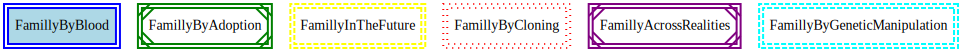

In [391]:
legend

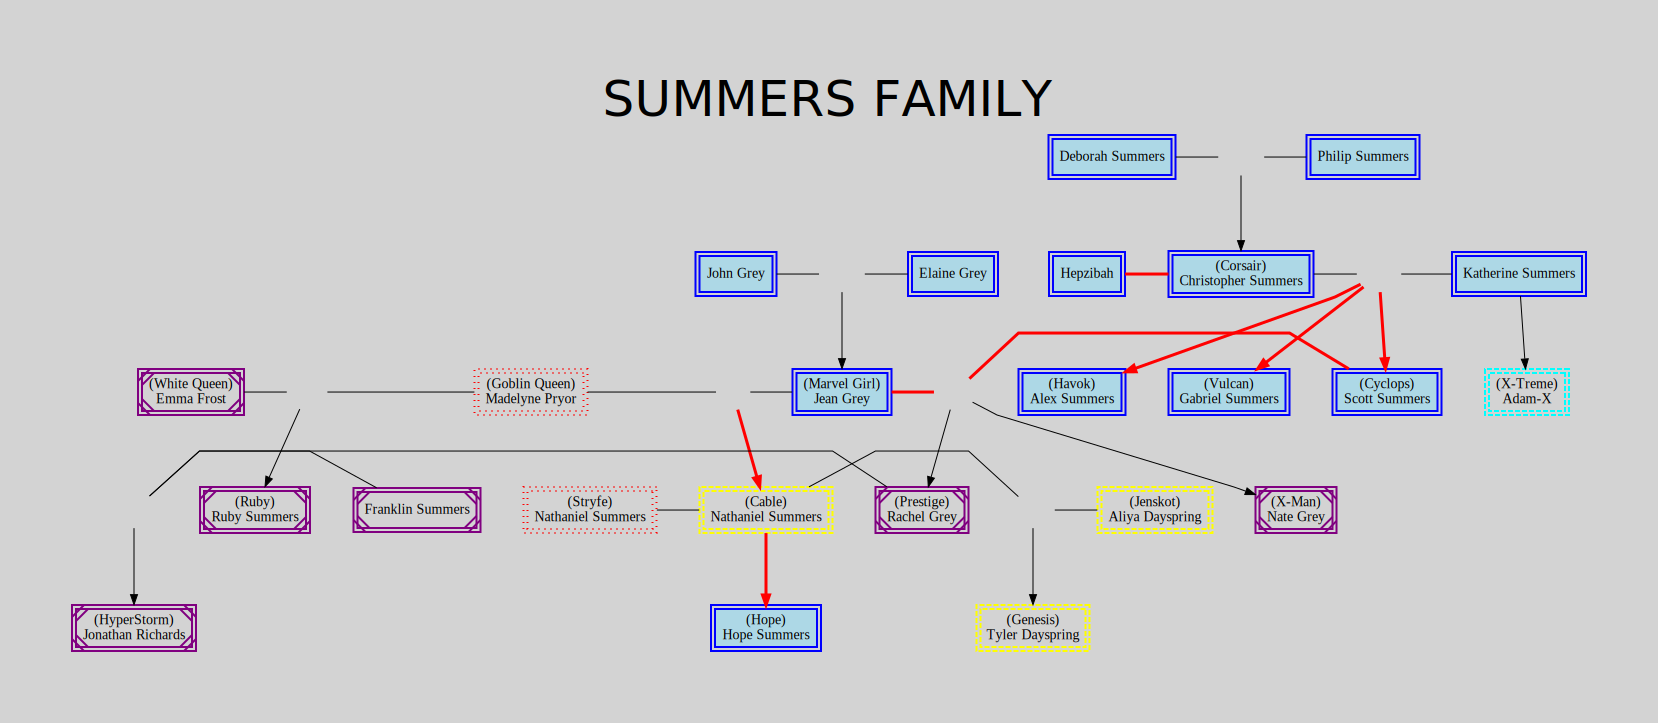

In [392]:
summersFamily